In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
train_dir='C:/Users/DELL/Downloads/Brain Tumor Using Deep Learning/Brain Tumor Using Deep Learning/model/Main Dataset/Main Dataset/Training'
test_dir='C:/Users/DELL/Downloads/Brain Tumor Using Deep Learning/Brain Tumor Using Deep Learning/model/Main Dataset/Main Dataset/Testing'



In [4]:
batch_size = 18
epochs = 50
img_height = 128
img_width = 128

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 394 images belonging to 4 classes.


In [7]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D, Dense,Flatten, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.backend.clear_session()
from tensorflow.keras.models import Model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(128, 128, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), strides = 2,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides = 2,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides = 2,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides = 2,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), strides = 2,activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling2D())

model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [11]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
history = model.fit(train_data_gen, epochs=50,
validation_data= val_data_gen,)



Epoch 1/50
160/160 [==============================] - 38s 225ms/step - loss: 0.8229 - accuracy: 0.6498 - val_loss: 2.0482 - val_accuracy: 0.1878
Epoch 2/50
160/160 [==============================] - 35s 219ms/step - loss: 0.5480 - accuracy: 0.7840 - val_loss: 1.8346 - val_accuracy: 0.3198
Epoch 3/50
160/160 [==============================] - 35s 219ms/step - loss: 0.3983 - accuracy: 0.8467 - val_loss: 2.0233 - val_accuracy: 0.4569
Epoch 4/50
160/160 [==============================] - 35s 219ms/step - loss: 0.3181 - accuracy: 0.8739 - val_loss: 2.0005 - val_accuracy: 0.6193
Epoch 5/50
160/160 [==============================] - 35s 220ms/step - loss: 0.3191 - accuracy: 0.8861 - val_loss: 1.8404 - val_accuracy: 0.6244
Epoch 6/50
160/160 [==============================] - 35s 219ms/step - loss: 0.2223 - accuracy: 0.9213 - val_loss: 1.7783 - val_accuracy: 0.6853
Epoch 7/50
160/160 [==============================] - 35s 220ms/step - loss: 0.1781 - accuracy: 0.9331 - val_loss: 2.2611 - val_ac

In [19]:
import numpy as np

In [20]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

22/22 - 1s - 1s/epoch - 61ms/step


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [23]:
cm_plot_labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

Confusion matrix, without normalization
[[ 20  32  44   4]
 [  0 110   5   0]
 [  0   0 105   0]
 [  0   3  10  61]]
Accuracy: 0.751
Precision: 0.696
Recall: 0.751
F-Measure: 0.751


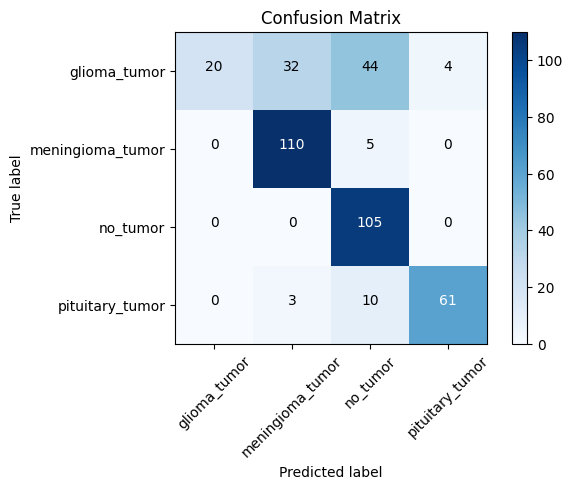

In [24]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)